In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df=pd.read_csv('Housing.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


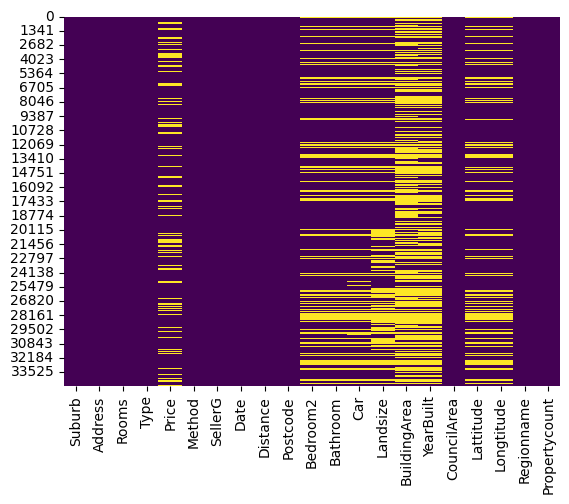

In [4]:
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.show()

In [120]:
data = df[['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']]
data.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [ ]:
data.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [ ]:
cols=['Propertycount','Distance','Bedroom2','Bathroom','Car']
data[cols] = data[cols].fillna(0)
data['Landsize']=data['Landsize'].fillna(data['Landsize'].mean())
data['BuildingArea']=data['BuildingArea'].fillna(data['BuildingArea'].mean())
data.isna().sum()

/var/folders/sq/0c4j_x091jngfd2nls5zlk240000gn/T/ipykernel_3897/3987086199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols] = data[cols].fillna(0)
/var/folders/sq/0c4j_x091jngfd2nls5zlk240000gn/T/ipykernel_3897/3987086199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Landsize']=data['Landsize'].fillna(data['Landsize'].mean())
/var/folders/sq/0c4j_x091jngfd2nls5zlk240000gn/T/ipykernel_3897/3987086199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [ ]:
data.dropna(inplace=True)

/var/folders/sq/0c4j_x091jngfd2nls5zlk240000gn/T/ipykernel_3897/1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
data = pd.get_dummies(data[''], drop_first=True)
data = data.astype(int)
data.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019,2,2,1,1,202,160,1480000,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019,2,2,1,0,156,79,1035000,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019,2,3,2,0,134,150,1465000,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019,2,3,2,1,94,160,850000,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019,2,3,1,2,120,142,1600000,0,...,0,0,0,0,0,0,0,0,1,0


In [122]:
cor=data.corr()
cor

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
Rooms,1.000000,-0.071677,0.271511,0.946755,0.611826,0.393878,0.037402,0.156229,0.465238,0.005884,...,0.003722,-0.072467,0.021379,-0.133629,-0.053638,0.045911,0.052894,0.056136,-0.121839,0.026743
Propertycount,-0.071677,1.000000,-0.018140,-0.053451,-0.032887,-0.009617,-0.018195,-0.024523,-0.059017,-0.065316,...,-0.016141,0.005448,-0.030229,0.012791,-0.032942,-0.081662,0.032822,0.177709,0.062705,-0.015043
Distance,0.271511,-0.018140,1.000000,0.269524,0.126201,0.241835,0.060862,0.076301,-0.211384,-0.020099,...,0.054937,-0.122209,0.090337,-0.174449,-0.142977,0.066649,0.193838,0.126787,-0.239787,0.134866
Bedroom2,0.946755,-0.053451,0.269524,1.000000,0.614892,0.388491,0.037019,0.154157,0.430275,0.005601,...,0.003806,-0.071152,0.024219,-0.127037,-0.059276,0.052784,0.056049,0.053544,-0.117641,0.025250
Bathroom,0.611826,-0.032887,0.126201,0.614892,1.000000,0.307518,0.036333,0.147558,0.429878,0.018774,...,0.000868,-0.093426,0.024366,-0.052065,0.012435,0.021866,0.021195,0.029418,-0.052813,0.011488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CouncilArea_Whitehorse City Council,0.045911,-0.081662,0.066649,0.052784,0.021866,0.012775,0.000121,0.005453,0.024567,-0.006444,...,-0.001904,-0.034206,-0.006759,-0.026231,-0.028090,1.000000,-0.020957,-0.018139,-0.025214,-0.007278
CouncilArea_Whittlesea City Council,0.052894,0.032822,0.193838,0.056049,0.021195,0.050665,-0.003288,0.001889,-0.108875,-0.007482,...,-0.002211,-0.039715,-0.007848,-0.030456,-0.032615,-0.020957,1.000000,-0.021060,-0.029276,-0.008450
CouncilArea_Wyndham City Council,0.056136,0.177709,0.126787,0.053544,0.029418,0.045210,-0.000110,0.004438,-0.102743,-0.006475,...,-0.001913,-0.034374,-0.006792,-0.026361,-0.028229,-0.018139,-0.021060,1.000000,-0.025339,-0.007314
CouncilArea_Yarra City Council,-0.121839,0.062705,-0.239787,-0.117641,-0.052813,-0.121464,0.021763,-0.025020,0.015461,-0.009001,...,-0.002660,-0.047784,-0.009442,-0.036644,-0.039241,-0.025214,-0.029276,-0.025339,1.000000,-0.010167


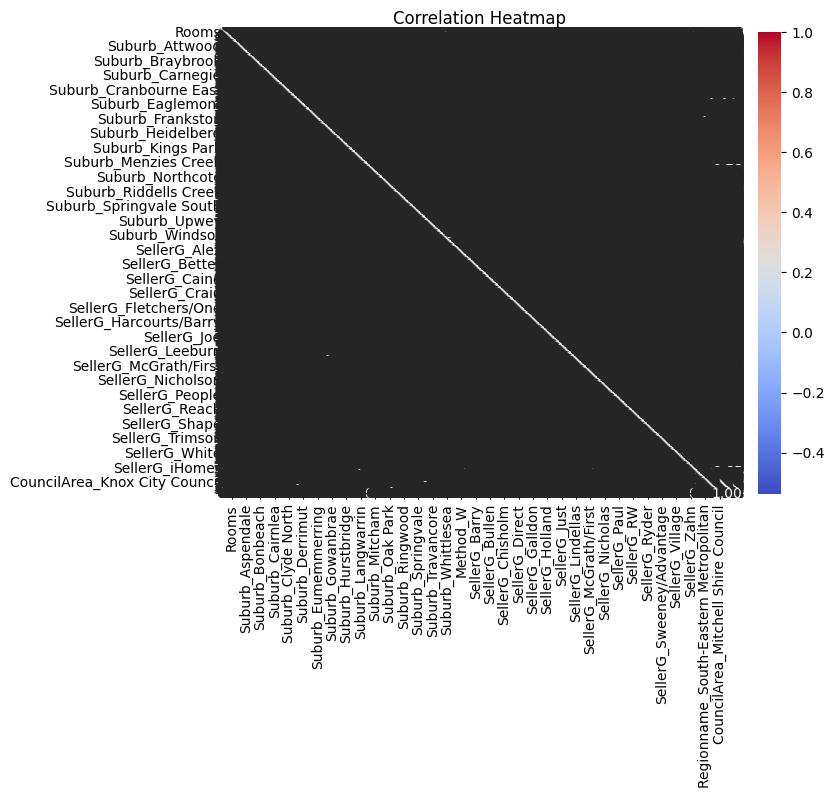

In [123]:
# plt.figure(figsize=(8, 6))
# sn.heatmap(cor, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()


In [ ]:
x=data.drop('Price',axis='columns')
y=data['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.3)


In [ ]:
x_train.shape

(19070, 744)

In [ ]:
y_train.shape

(19070,)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)

In [ ]:
linpred=reg.predict(x_test)
print(linpred)

[1673392.66194607 1077095.54591076  842608.38991945 ...  888626.6796437
  784790.44051425 1178353.66928832]


In [ ]:
from sklearn.metrics import r2_score
scorelin=r2_score(linpred,y_test)
scorelin

0.3290384407388578

In [ ]:
reg.score(x_train,y_train)

0.6825862950046448

In [ ]:
reg.score(x_test,y_test)

0.1341316858752274

In [ ]:
from sklearn.linear_model import Lasso
lassoreg=Lasso(alpha=50,max_iter=100,tol=0.1)
lassoreg.fit(x_train,y_train)

/Users/avyaahuja/XLSCOUT/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.323e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lassoreg.score(x_train,y_train)

0.6765562610203997

In [ ]:
lassoreg.score(x_test,y_test)

0.6633169721521481

In [ ]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridgereg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(ridgereg, x_train, y_train, scoring='neg_mean_squared_error')
neg_mse_scores

array([-2.42873988e+11, -1.34469815e+11, -1.70193401e+11, -1.36723981e+11,
       -1.51098623e+11])

In [ ]:
rpred=ridgereg.predict(x_test)
rpred

array([1623869.44984216, 1034313.81346951,  898624.2950659 , ...,
        928438.70062865,  798825.85180506, 1246171.31356856])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, rpred)
r2

0.6669747759118698

In [ ]:
ridgereg.score(x_train,y_train)

0.6619849633207061

In [ ]:
ridgereg.score(x_test,y_test)

0.6669747759118698

In [ ]:
from sklearn.model_selection import GridSearchCV
ridge_reg=Ridge()
parameters={'alpha':[1,2,40,50,60]}
ridgecv=GridSearchCV(ridge_reg,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1, 2, 40, 50, 60]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 2}


In [ ]:
print(ridgecv.best_score_)

-160617452810.13885


In [ ]:
rcvpred=ridgecv.predict(x_test)
rcvpred

array([1684791.66150711, 1067795.84754033,  897145.03667966, ...,
        898254.95932374,  785365.01733159, 1191584.49693792])

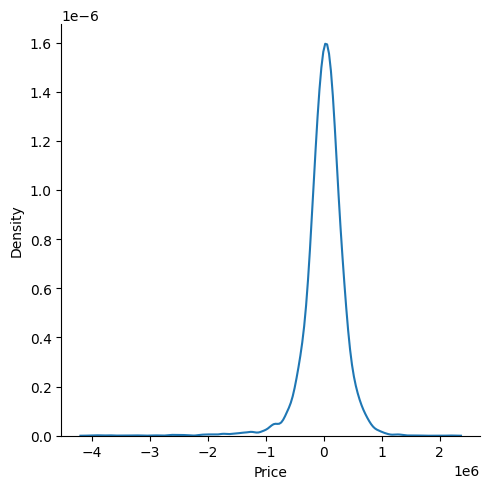

In [ ]:
import seaborn as sns
sns.displot(rcvpred-y_test,kind='kde')

In [ ]:
scorecv=r2_score(rcvpred,y_test)
scorecv

0.5440645888503923

In [ ]:
ridgecv.score(x_train,y_train)

-134203417305.73267

In [ ]:
ridgecv.score(x_test,y_test)

-130018800861.82886